In [9]:
import pandas as pd
import numpy as np
import csv
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import folium

In [56]:
address = set()
mmap = {"longitude":[], "latitude":[]}
# the repo does not contain health_kit.csv file, since it includes the personal information
with open("address.csv", "r", encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader, None) 
    for row in reader:
        if len(row) >= 3:
            address.add(row[5])

address            
geolocator = Nominatim(user_agent="buaaadqwdq")
for e in address:
    e = e + " madison WI"
    location = geolocator.geocode(e,timeout=None)
    print(location)
    if location is None:
        continue
    if location.latitude > 42:
        mmap["latitude"].append(location.latitude)
        mmap["longitude"].append(location.longitude)

Lark, 1421,1423,1425, Monroe Street, South Campus, Bowens Addition, Madison, Dane County, Wisconsin, 53706, United States
University Heights, 2308, University Avenue, Regent, Madison, Dane County, Wisconsin, 53726, United States
725, Eugenia Avenue, Sunset Village, Madison, Dane County, Wisconsin, 53705, United States
619, North Segoe Road, Madison Yards at Hill Farms, Madison, Dane County, Wisconsin, 53705, United States
265, Langdon Street, State-Langdon, Madison, Dane County, Wisconsin, 53703, United States
The Palisades, 535, West Johnson Street, State-Langdon, Madison, Dane County, Wisconsin, 53703, United States
1308, Spring Street, South Campus, Bowens Addition, Madison, Dane County, Wisconsin, 53715, United States
2, Plover Circle, Sauk Creek, Madison, Dane County, Wisconsin, 53717, United States
Park Regent Apartments, 4, North Park Street, South Campus, Bowens Addition, Madison, Dane County, Wisconsin, 53715, United States
West Dayton Street, State-Langdon, Bowens Addition, M

Eagle Heights, Madison, Dane County, Wisconsin, United States
4859, Sheboygan Avenue, Indian Hills, Madison Yards at Hill Farms, Madison, Dane County, Wisconsin, 53705, United States
Timber Lake Trail, Madison, Dane County, Wisconsin, 53719, United States
1224, Spring Street, South Campus, Bowens Addition, Madison, Dane County, Wisconsin, 53715, United States
660, State Street, State-Langdon, Madison, Dane County, Wisconsin, 53703, United States
424, West Mifflin Street, Mifflin West, Madison, Dane County, Wisconsin, 53703, United States
Langdon St. & N. Lake St., 633, Langdon Street, State-Langdon, Madison, Dane County, Wisconsin, 53703, United States
Aberdeen Apartments, 437, West Gorham Street, State-Langdon, Madison, Dane County, Wisconsin, 53703, United States
Eagle Heights, Madison, Dane County, Wisconsin, United States
Eagle Heights, Madison, Dane County, Wisconsin, United States
Humbucker Apartments, 1216, Spring Street, South Campus, Bowens Addition, Madison, Dane County, Wisc

In [58]:
df = pd.DataFrame(mmap)
BBox = (df.longitude.min(),df.longitude.max(), df.latitude.min(), df.latitude.max())
BBox

(-89.56438866252373, -89.29376437153667, 43.047999859738226, 43.14972946359947)

In [59]:
%matplotlib inline

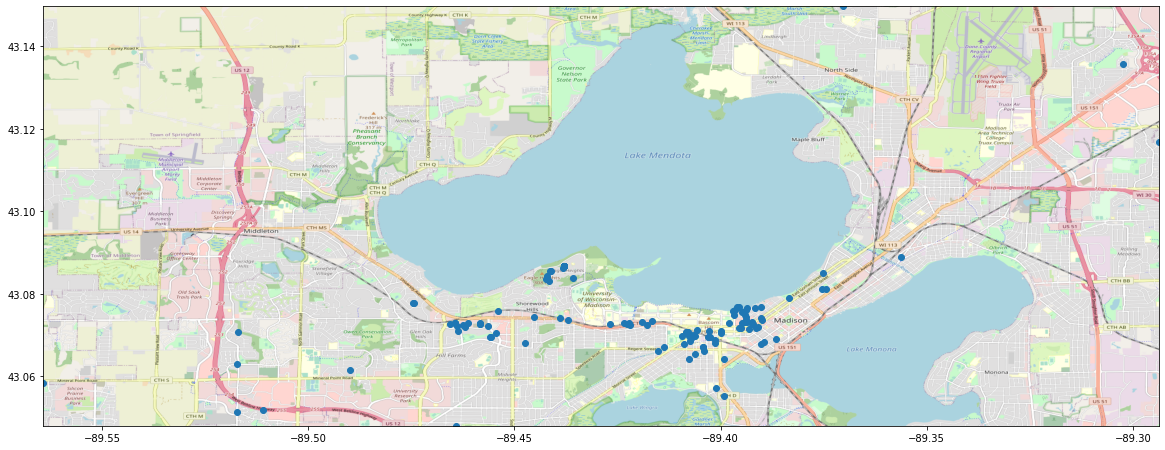

In [72]:
city_map = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.longitude, df.latitude)
ax.set_title('')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(city_map, zorder=0, extent = BBox, aspect= 'equal')